# Tarea N°3

### César Cerda Bollmann

In [1]:
install.packages('tidyr')
install.packages('ggplot2')
install.packages('data.table')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘generics’, ‘dplyr’, ‘tidyselect’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’


Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(purrr)
library(ggplot2)
library(data.table)


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose




## Pregunta N°1

### a) Gráfico la función densidad

In [3]:
x=seq(-10,10,0.1)
y=1:length(x)
for (i in 1:length(x)) {
    if (x[i]<0){
        y[i]=0.5*exp(x[i])
    } else if(x[i]>=0) {     
        y[i]=0.5*exp(-x[i])
    }
}

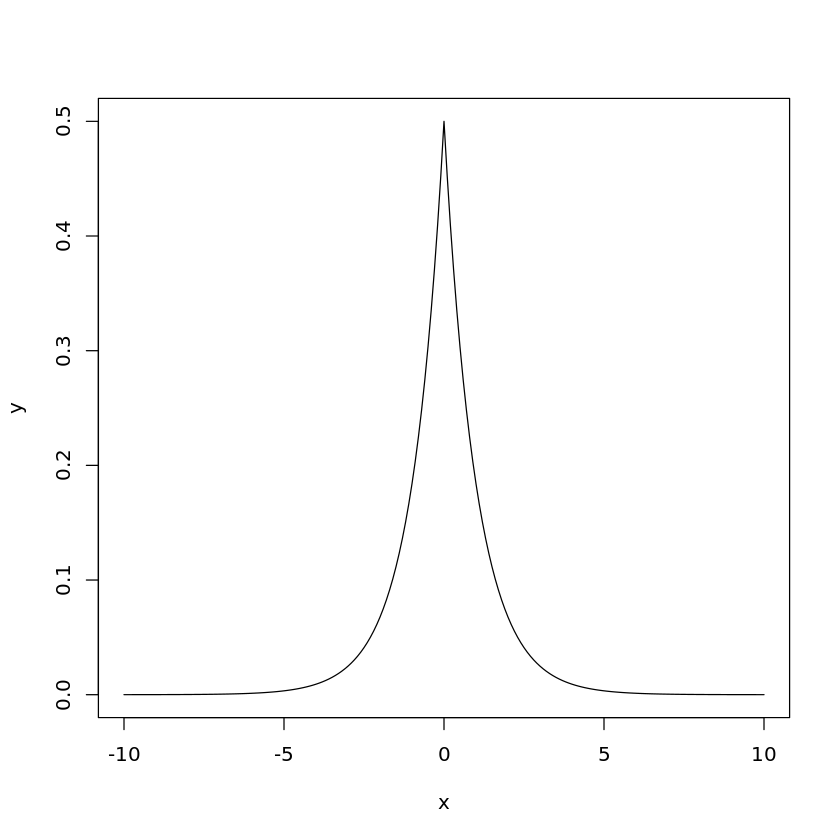

In [4]:
plot(x,y,type='l')

### b)Gráfico de F(x)

In [6]:
X = seq(-10,10,0.1)
F = 1:length(X)
for (i in 1:length(X)){
    if (X[i]<0){
        F[i] = 0.5*exp(X[i])
        }
    if (X[i]>=0){
        F[i]= 1- 0.5*exp(-X[i])
        }
    }

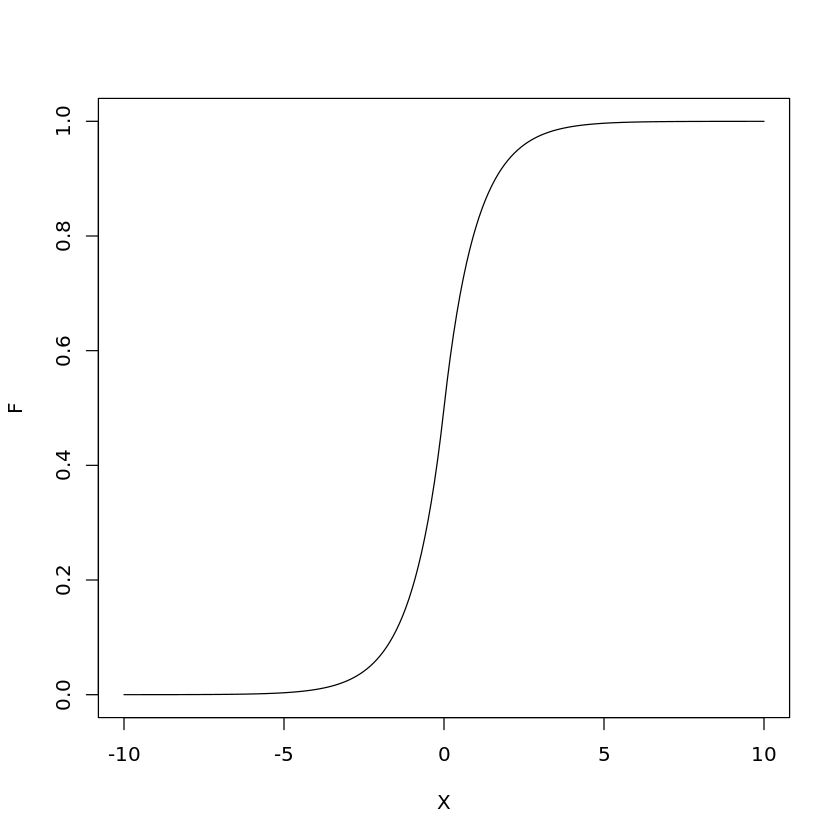

In [7]:
plot(X,F,type='l')

In [14]:
sample_uniform = runif(1000, 0, 1)

In [18]:
sample_F = 1:length(sample_uniform)
for (i in 1:length(sample_uniform)){
    if (sample_uniform[i]<0.5){
        sample_F[i] = log(2*sample_uniform[i])
        }
    if (sample_uniform[i]>=0.5){
        sample_F[i]= -log(2-2*sample_uniform[i])
        }
    }

In [19]:
sample_F_data = data.frame(sample_F)

In [20]:
sample_F_data['sample_F']

sample_F   
1    -1.04769492
2    -1.91020177
3    -0.71053797
4     1.57014990
5    -0.37857684
6     0.64550182
7     0.85370075
8    -0.59234285
9    -0.41215582
10    2.11197504
11   -0.60531663
12    1.19449930
13    2.90298101
14    0.02381039
15    0.05878314
16   -1.67728729
17    1.22415084
18    0.23666150
19    0.16122120
20    1.83569973
21    0.73509779
22    1.69241758
23   -0.17590371
24   -1.76953373
25    0.86291448
26    0.05364190
27    1.39667110
28   -0.29245696
29   -0.46691632
30    1.52363214
⋮    ⋮          
971   0.72095831
972   0.47055285
973  -0.01657598
974  -0.33209996
975  -0.14180605
976   0.22864390
977   0.07432193
978   1.49581048
979  -0.70321865
980  -0.04494073
981   0.14033447
982   0.15296019
983   4.97595290
984  -5.89502185
985   0.96168686
986  -1.22703926
987   0.35452241
988   0.42419537
989  -0.84434526
990  -4.11102664
991  -0.70543856
992  -2.19379648
993   0.31350362
994   2.05856542
995  -1.03779468
996  -0.57283056
997   1.23304848
998   0.49589169
999  -0.54535397
1000  0.69838040

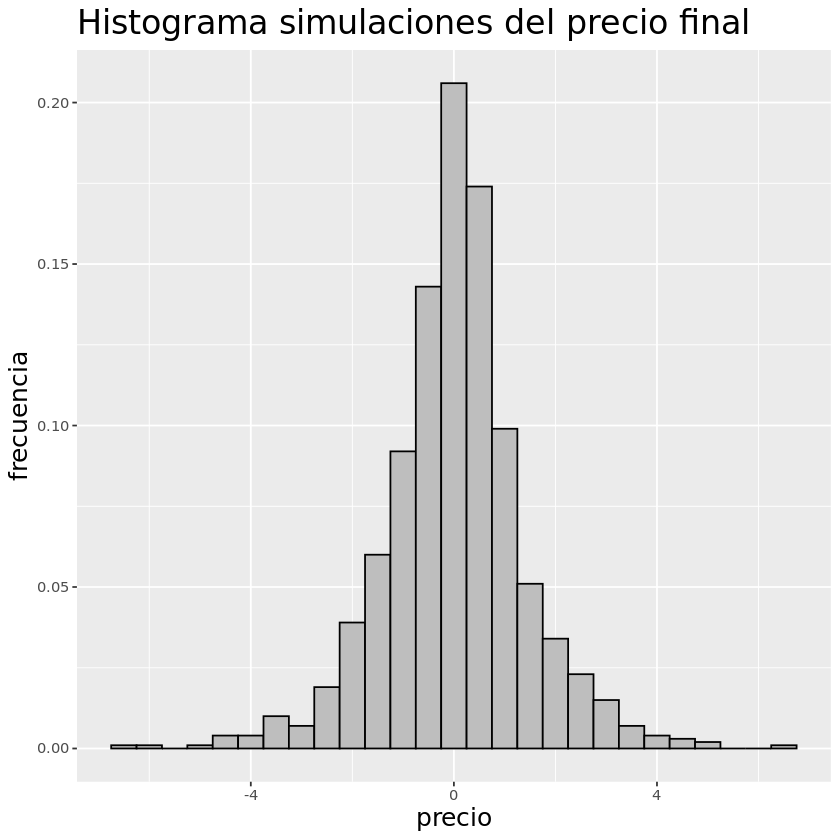

In [38]:
bin <- 0.5
plotfig <- ggplot(sample_F_data,aes(sample_F))+
        theme(plot.title = element_text(size = 20),
              axis.title.y=element_text(size = 15),
              axis.title.x=element_text(size = 15))
 
p <- plotfig+geom_histogram(aes(y = after_stat(count /(sum(count)))), binwidth=bin, color="black", fill="gray")+
       labs(x="precio",
            y="frecuencia",
            title=paste0("Histograma simulaciones del precio final"))

#p <- p+ geom_vline(aes(xintercept=mean(PT)),
#            color="blue", linetype="dashed", size=1)
           
p 

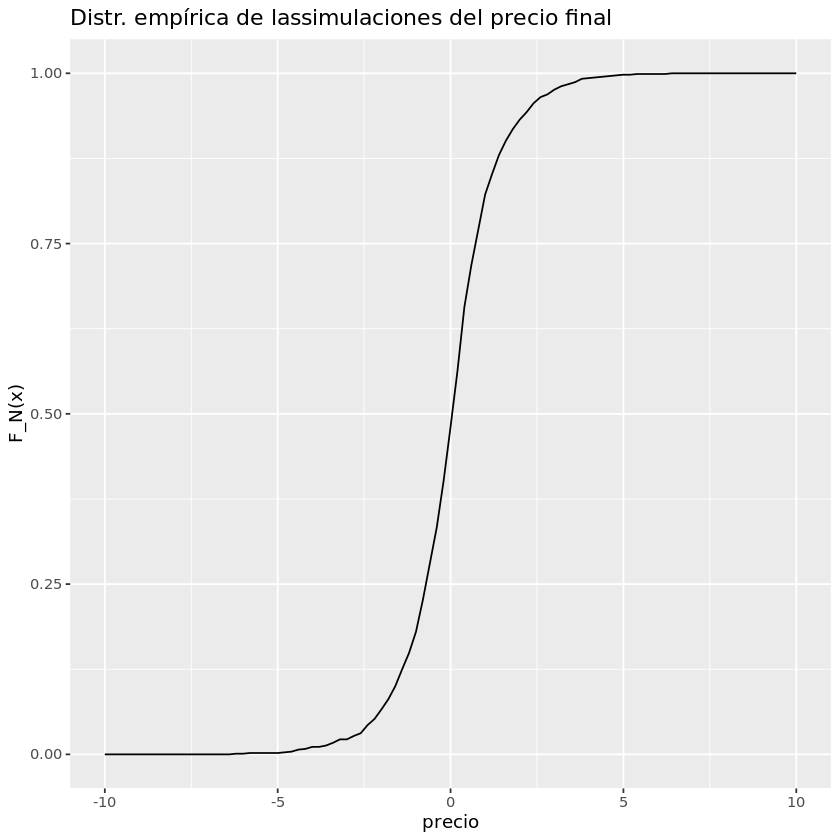

In [22]:
pfin2 = ggplot(sample_F_data,aes(sample_F))+geom_function(fun=ecdf(sample_F))+
         xlim(-10,10)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
pfin2

In [ ]:
test2 = function(x) {ifelse(x<0, 1, 2)}

In [33]:
test3 = function(x) {ifelse(x<0, 0.5*exp(x),1- 0.5*exp(-x))}

In [24]:
test2 = function(x) { if (x<0){
    x=1
    }else{x=3}
    }

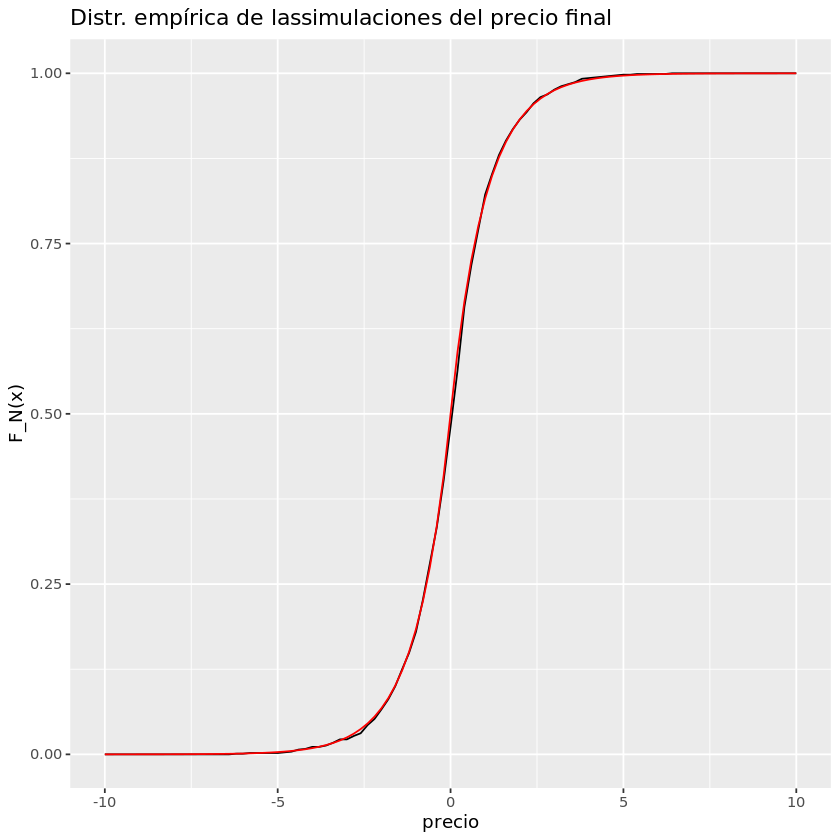

In [61]:
pfin3 = pfin2 + stat_function(fun = test3, color="red")
pfin3

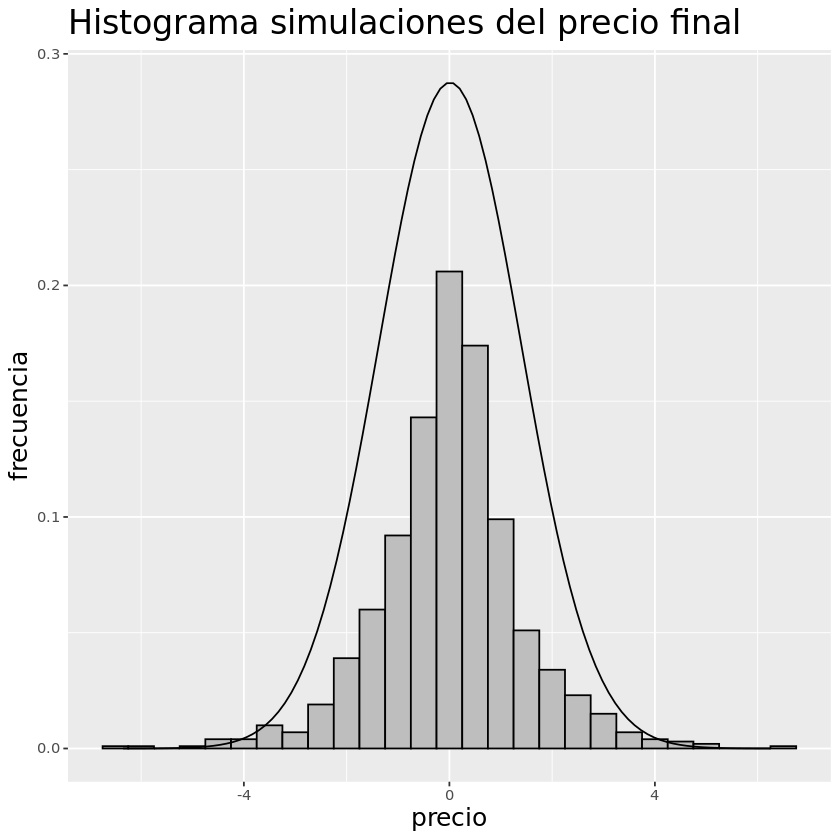

In [59]:
p+geom_function(fun = dnorm, args = list(mean = 0.01226, sd = 1.387))

In [ ]:
pfin4 =pfin3+stat_function(fun = pnorm, n = 1000, args = list(mean = 0.01226, sd = 1.387), color = "green") 

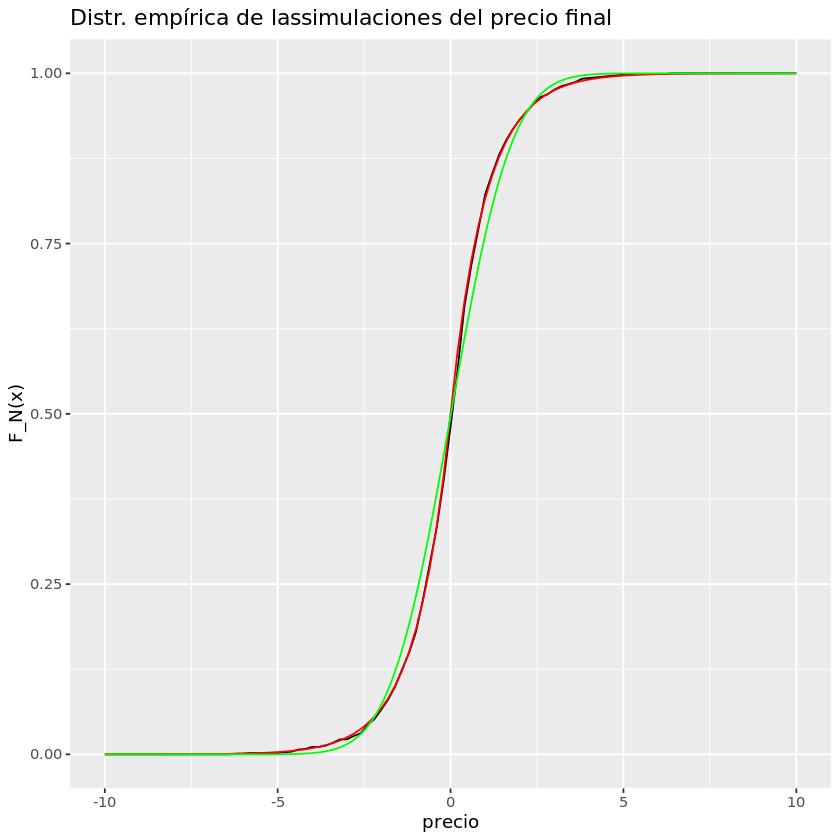

In [67]:
pfin4

In [41]:
media =mean(sample_F)
media

[1] 0.01225856

In [44]:
stdrd =sd(sample_F)
stdrd

[1] 1.386995

In [70]:
pfin5 = pfin3+geom_function(fun=pnorm, args = list(mean = 0.01226, sd = 1.387), color="red")

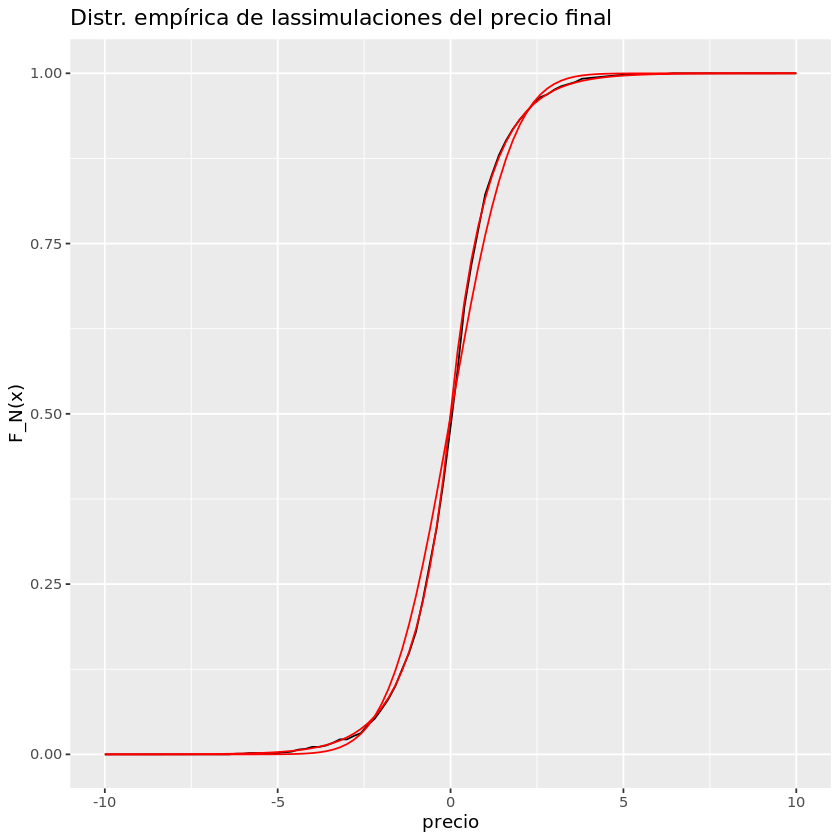

In [71]:
pfin5

## Pregunta N°2

### a) Test-t independiente

In [1]:
install.packages("readxl")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [2]:
library(readxl)

#### Nos interesa evaluar cual política de inventario es mejor.  Para esto se plantea la siguiente hipótesis
#### Ho : u(400) >= u(300)
#### Ha : u(400) < u(300)

In [12]:
data = read_excel("data_independiente.xlsx")
data = as.data.frame(data)

In [13]:
dat400 = data$Ss_400
dat300 = data$Ss_300

In [14]:
res.ftest = var.test(dat400, dat300, data = data)
res.ftest


	F test to compare two variances

data:  dat400 and dat300
F = 1.816, num df = 999, denom df = 999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.604041 2.055892
sample estimates:
ratio of variances 
          1.815967 


#### p-value < 2.2e-16 < 0.05, por lo que no hay evidencia para decir que las varianzas son iguales.  Suponemos entonces que las varianzas son distintas

In [15]:
res = t.test(dat400, dat300, alternative = "less", var.equal = FALSE)
res


	Welch Two Sample t-test

data:  dat400 and dat300
t = 1.4015, df = 1843.2, p-value = 0.9194
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 15549.83
sample estimates:
mean of x mean of y 
   259524    252372 


#### como p-value = 0.9194, no existe evidencia para rechazar la hipótesis nula

### b) Comparación utilizando un test-t pareado, aplicado a simulaciones independientes de las dos configuraciones

In [ ]:
#Se crea una nueva variable aleatoria dif_dat=dat400 - dat300
dif_dat = dat400-dat300

#### Nos interesa saber si la u(dif_dat) >= 0.  Se genera la siguiente hipótesis:
#### Ho : u(dif_dat) >= 0
#### Ha : u(dif_dat) < 0

In [22]:
res_b = t.test(dat400, dat300, paired = TRUE,  alternative = "less")
res_b


	Paired t-test

data:  dat400 and dat300
t = 1.4107, df = 999, p-value = 0.9207
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 15498.74
sample estimates:
mean of the differences 
                   7152 


### c) test-t pareado, aplicado a simulaciones generadas con los mismos números aleatorios

In [2]:
data_c = read_excel("ModeloP2(Demanda unica).xlsx", sheet = "Simulation Data Dump 1&2")
data_c = as.data.frame(data_c)

ERROR: Error in read_excel("ModeloP2(Demanda unica).xlsx", sheet = "Simulation Data Dump 1&2"): could not find function "read_excel"


In [20]:
dat400c = data_c$Ss400
dat300c = data_c$Ss300

In [4]:
res_c = t.test(dat400c, dat300c, paired = TRUE,  alternative = "less")
res_c

ERROR: Error in t.test(dat400c, dat300c, paired = TRUE, alternative = "less"): object 'dat400c' not found


## Pregunta N°3

In [3]:
stock_data = read.csv("prices4stocks.csv", sep=",")

In [3]:
summary(stock_data)

      Day               A               B               C         
 Min.   :  1.00   Min.   :28.28   Min.   :32.51   Min.   : 85.38  
 1st Qu.: 63.75   1st Qu.:30.96   1st Qu.:39.55   1st Qu.: 94.61  
 Median :126.50   Median :33.31   Median :44.99   Median :101.49  
 Mean   :126.50   Mean   :35.75   Mean   :44.95   Mean   :102.64  
 3rd Qu.:189.25   3rd Qu.:40.79   3rd Qu.:48.77   3rd Qu.:107.78  
 Max.   :252.00   Max.   :51.78   Max.   :61.97   Max.   :127.94  
       D        
 Min.   :48.12  
 1st Qu.:54.27  
 Median :67.01  
 Mean   :66.33  
 3rd Qu.:76.93  
 Max.   :94.10  

In [4]:
largo=length(stock_data$A)
largo

[1] 252

In [5]:
head(stock_data)

Day A     B     C     D    
1 1   29.77 39.06 85.38 70.56
2 2   30.56 38.50 87.03 72.84
3 3   31.02 34.95 88.19 61.95
4 4   31.92 37.35 90.85 61.87
5 5   32.84 38.14 91.19 61.95
6 6   34.05 38.87 92.66 61.44

In [5]:
logA =c()
logB =c()
logC =c()
logD =c()

In [6]:
for (i in 1:largo){
    logA[i] = log(stock_data$A[i+1]/stock_data$A[i])
    logB[i] = log(stock_data$B[i+1]/stock_data$B[i])
    logC[i] = log(stock_data$C[i+1]/stock_data$C[i])
    logD[i] = log(stock_data$D[i+1]/stock_data$D[i])
    }

In [7]:
sd_A=sd(logA, na.rm=TRUE)
sd_B=sd(logB, na.rm=TRUE)
sd_C=sd(logC, na.rm=TRUE)
sd_D=sd(logD, na.rm=TRUE)

In [8]:
medA=mean(logA,na.rm=TRUE)
medB=mean(logB,na.rm=TRUE)
medC=mean(logC,na.rm=TRUE)
medD=mean(logD,na.rm=TRUE)

In [9]:
drift_A= medA+sd_A^2/2
drift_B= medB+sd_B^2/2
drift_C= medC+sd_C^2/2
drift_D= medD+sd_D^2/2

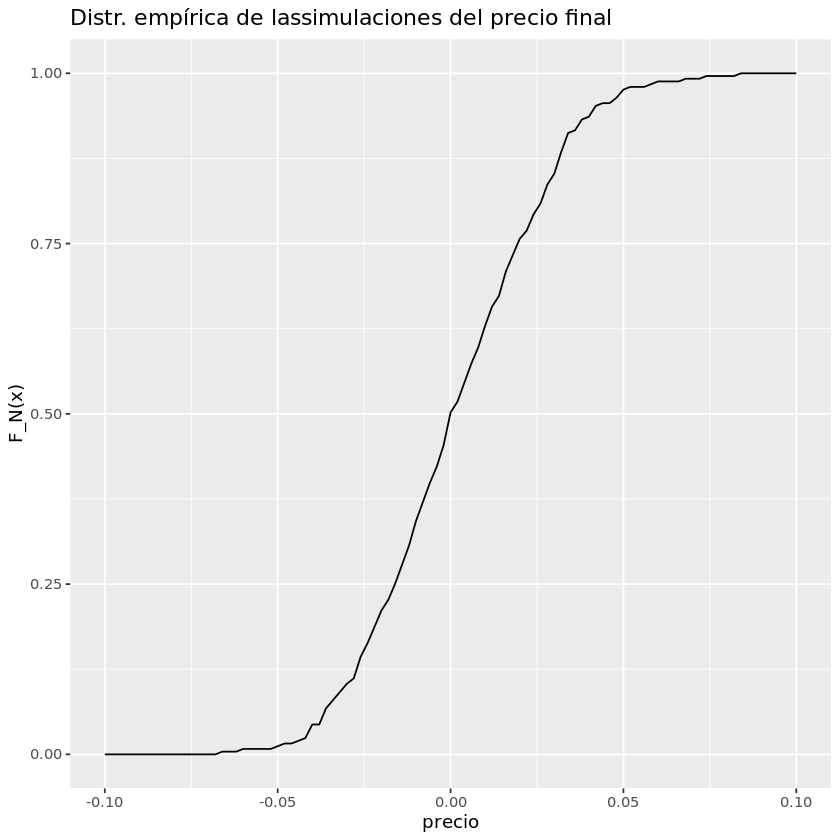

In [10]:
plotA = ggplot(data.frame(logA),aes(logA))+geom_function(fun=ecdf(logA))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotA

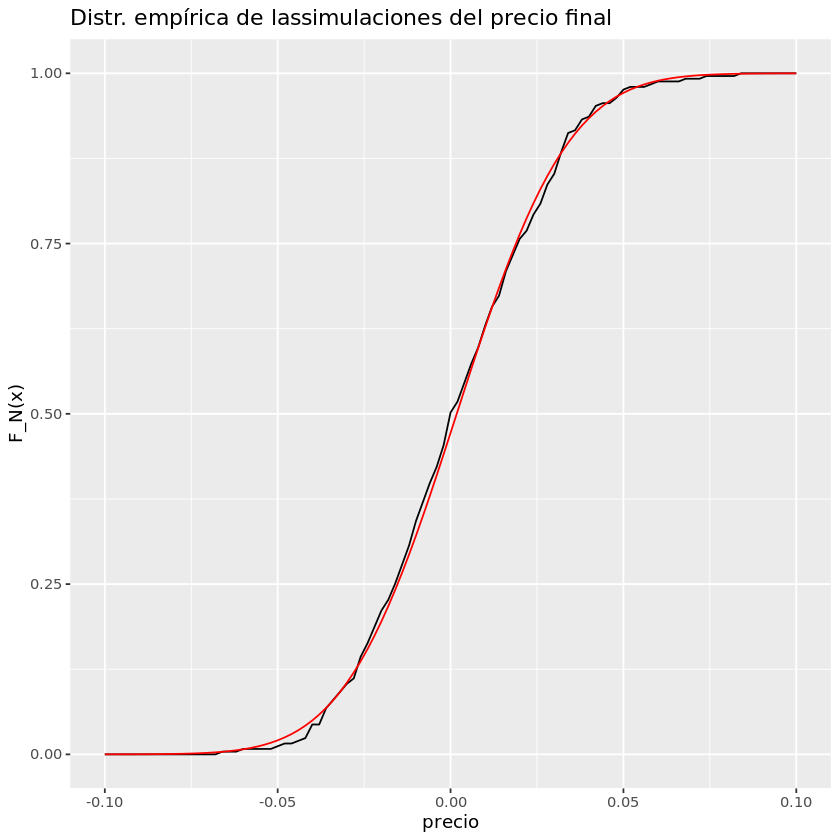

In [11]:
plotA2 = plotA + geom_function(fun=pnorm, args = list(mean = medA, sd = sd_A), color="red")
plotA2

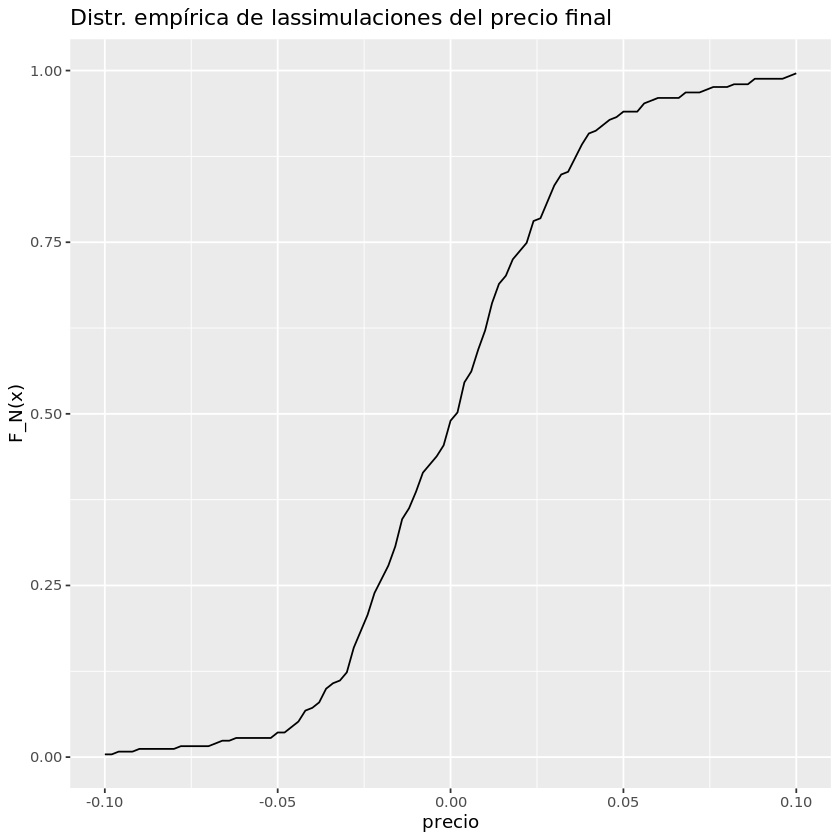

In [12]:
plotB = ggplot(data.frame(logB),aes(logB))+geom_function(fun=ecdf(logB))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotB

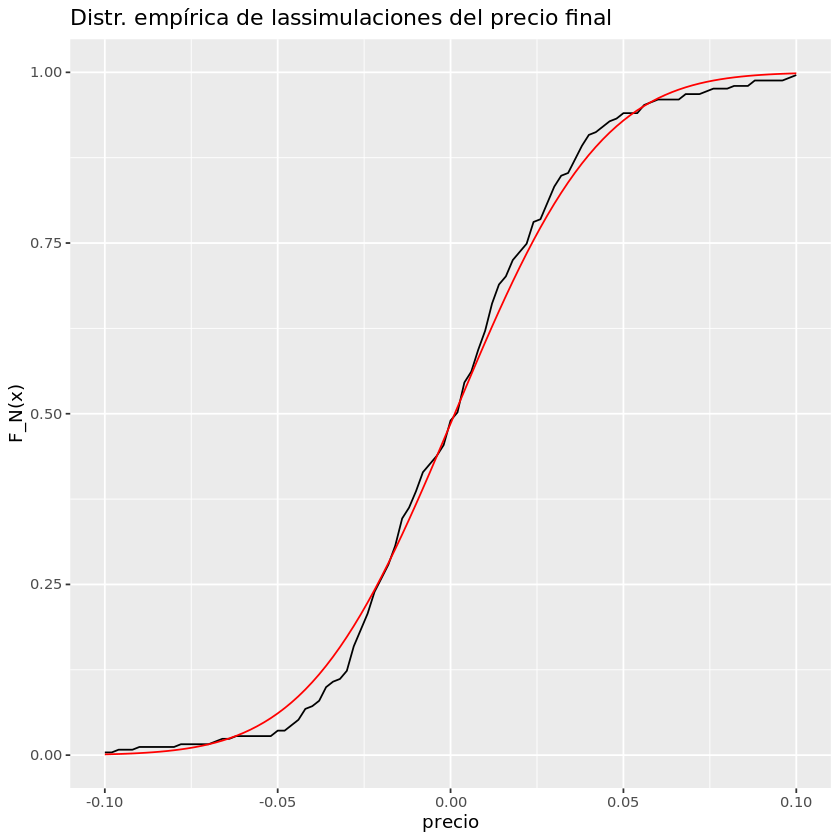

In [13]:
plotB2 = plotB + geom_function(fun=pnorm, args = list(mean = medB, sd = sd_B), color="red")
plotB2

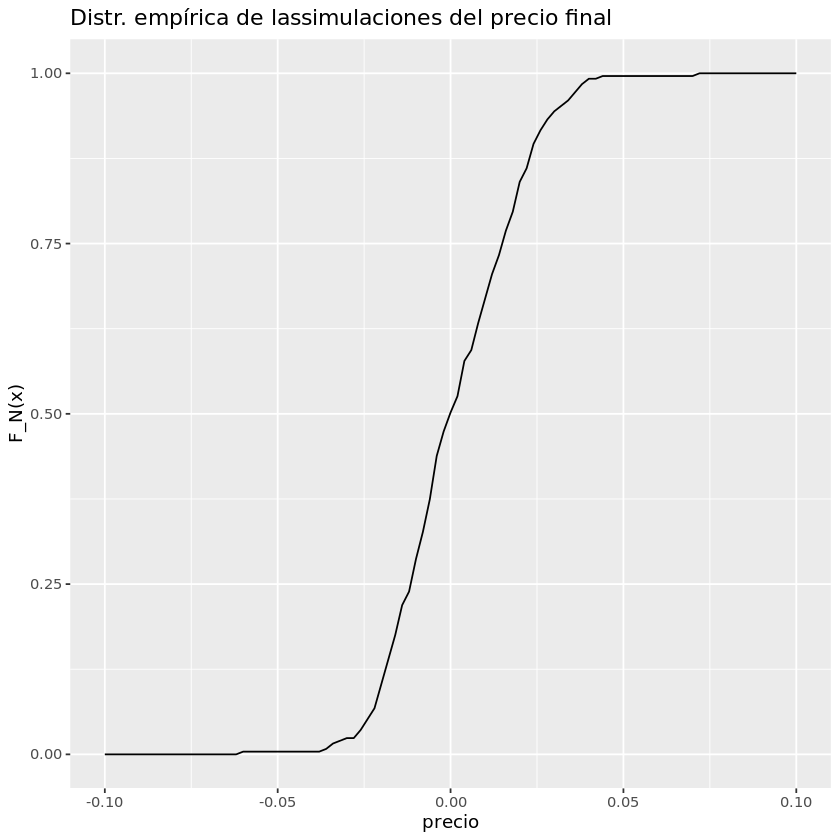

In [14]:
plotC = ggplot(data.frame(logC),aes(logC))+geom_function(fun=ecdf(logC))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotC

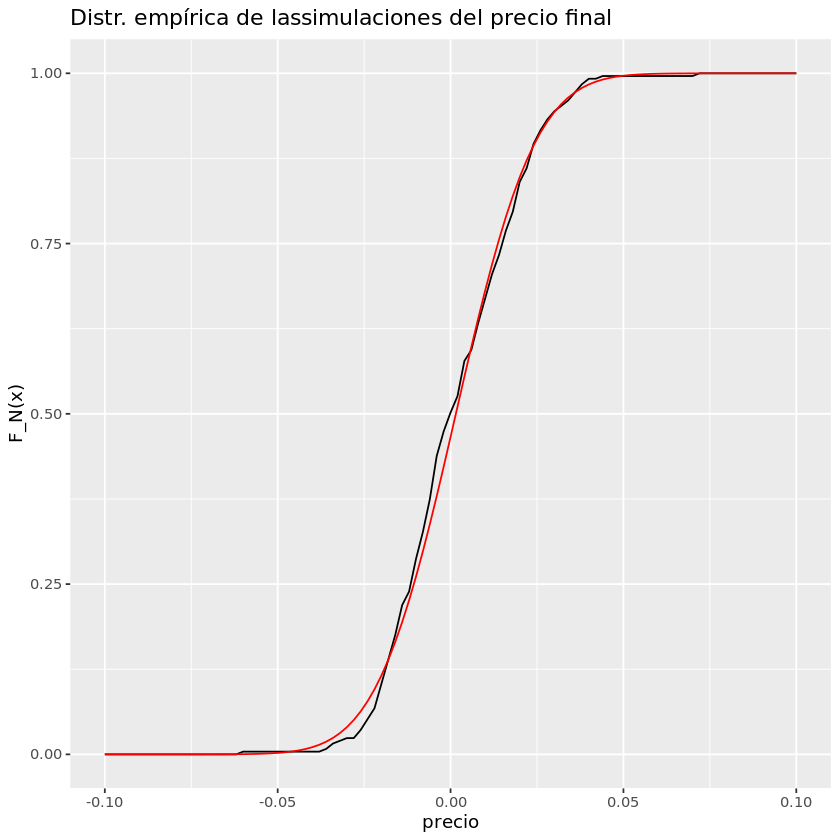

In [15]:
plotC2 = plotC + geom_function(fun=pnorm, args = list(mean = medC, sd = sd_C), color="red")
plotC2

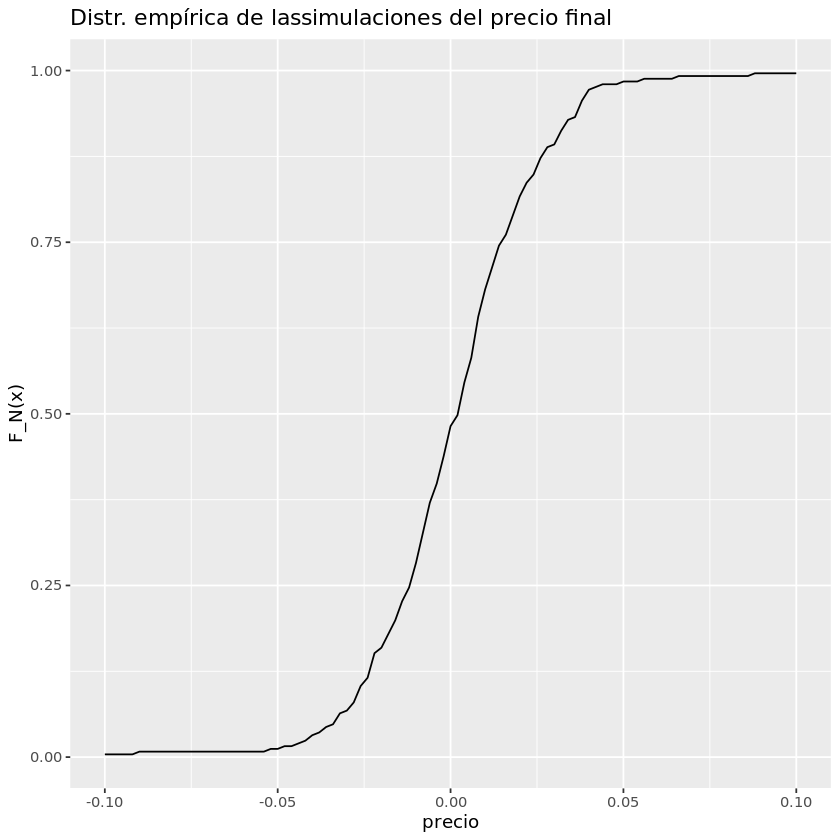

In [16]:
plotD = ggplot(data.frame(logD),aes(logD))+geom_function(fun=ecdf(logD))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plotD

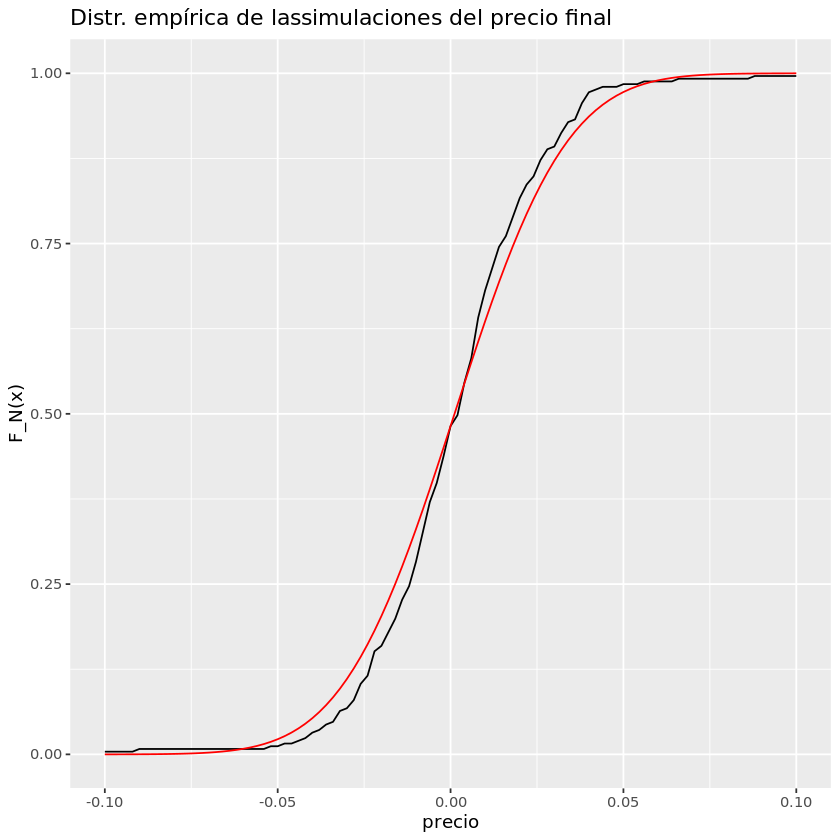

In [23]:
plotD2 = plotD + geom_function(fun=pnorm, args = list(mean = medD, sd = sd_D), color="red")
plotD2

### b) Porftafolio

In [17]:
N = 1000
T = 180
P0A=46.57
P0B=52.89
P0C=125.53
P0D=94.1
log_cambio_A = (drift_A-sd_A^2/2)*T + sd_A*sqrt(T)*rnorm(N,0,1)
PTA = P0A*exp(log_cambio_A)
log_cambio_B = (drift_B-sd_B^2/2)*T + sd_B*sqrt(T)*rnorm(N,0,1)
PTB = P0B*exp(log_cambio_B)
log_cambio_C = (drift_C-sd_C^2/2)*T + sd_C*sqrt(T)*rnorm(N,0,1)
PTC = P0C*exp(log_cambio_C)
log_cambio_D = (drift_D-sd_D^2/2)*T + sd_D*sqrt(T)*rnorm(N,0,1)
PTD = P0D*exp(log_cambio_C)

Se define una nueva variable aleatoria que es el valor de Portafolio de acuerdo a lo siguiente:

In [18]:
Portafolio = 120*PTA+300*PTB+200*PTC+150*PTD

In [19]:
E_Portafolio = mean(Portafolio)
E_Portafolio

[1] 83371.25

partiendo con N=1000 (N inicial), se estima con un que se requiere de al menos 1390 muestras para tener un margen de error del 1% del valor estimado

In [20]:
N_Calc = (1.96*sd(Portafolio))^2/(0.01*E_Portafolio)^2
N_Calc

[1] 1604.602

Calculando con con N=1400 se tiene:

In [21]:
N = 1600
T = 180
P0A=46.57
P0B=52.89
P0C=125.53
P0D=94.1
log_cambio_A = (drift_A-sd_A^2/2)*T + sd_A*sqrt(T)*rnorm(N,0,1)
PTA = P0A*exp(log_cambio_A)
log_cambio_B = (drift_B-sd_B^2/2)*T + sd_B*sqrt(T)*rnorm(N,0,1)
PTB = P0B*exp(log_cambio_B)
log_cambio_C = (drift_C-sd_C^2/2)*T + sd_C*sqrt(T)*rnorm(N,0,1)
PTC = P0C*exp(log_cambio_C)
log_cambio_D = (drift_D-sd_D^2/2)*T + sd_D*sqrt(T)*rnorm(N,0,1)
PTD = P0D*exp(log_cambio_C)

In [22]:
Portafolio_fin=120*PTA+300*PTB+200*PTC+150*PTD

In [23]:
E_Portafolio_fin = mean(Portafolio_fin)
E_Portafolio_fin

[1] 83309.11

In [24]:
Margen_Error = 1.96*sd(Portafolio_fin)/sqrt(N)
Margen_Error

[1] 827.1975

#### Ganancia Neta

In [25]:
r=0.03 #tasa de interés anual
T=0.5 #(180 días, medio año)
Portafolio_0=120*46.57+300*52.89+200*125.53+150*94.1

In [26]:
GN = Portafolio_fin - Portafolio_0*exp(r*T)*rep(1,N)

In [27]:
mean(GN)

[1] 21715.71

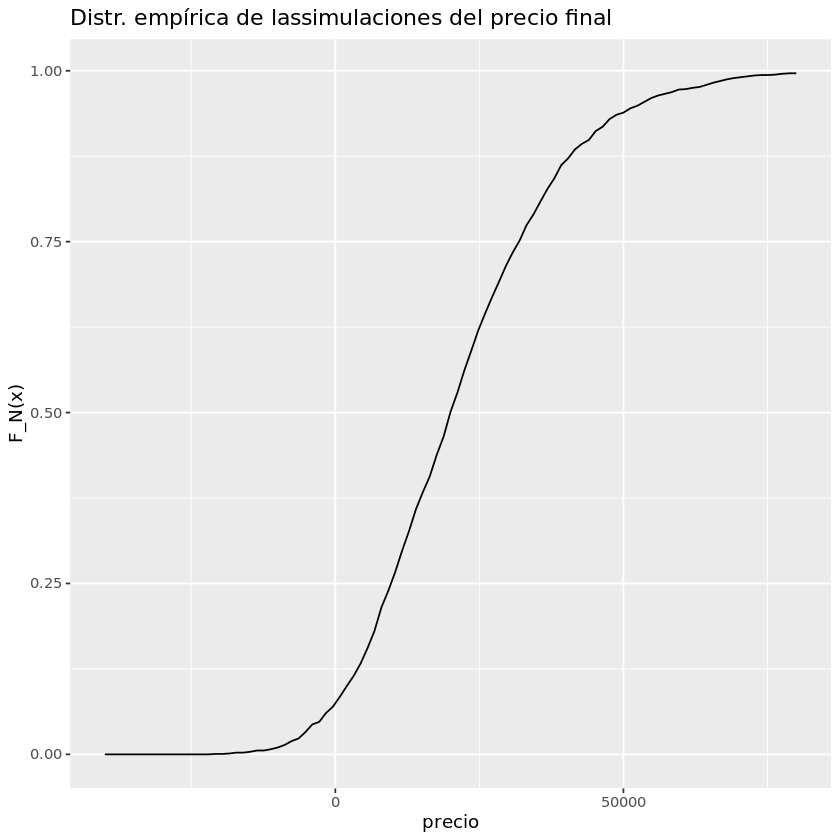

In [28]:
plot_port = ggplot(data.frame(GN),aes(GN))+geom_function(fun=ecdf(GN))+
         xlim(-40000,80000)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plot_port

#### c) Matriz de Correlación (Precios de Acciones)

In [29]:
matrix_data = matrix(c(PTA, PTB, PTC, PTD), ncol = 4)

In [30]:
matrix_cor_precios = cor(matrix_data)
matrix_cor_precios

[,1]       [,2]        [,3]        [,4]       
[1,] 1.00000000 0.025535414 0.040108273 0.040108273
[2,] 0.02553541 1.000000000 0.006467997 0.006467997
[3,] 0.04010827 0.006467997 1.000000000 1.000000000
[4,] 0.04010827 0.006467997 1.000000000 1.000000000

#### d) Matriz de Correlación (logaritmos de los ratios)

In [31]:
matrix_ratios = matrix(c(logA, logB, logC, logD), ncol = 4)

In [32]:
matrix_cor_ratios = cor(matrix_ratios, use = "complete.obs")
matrix_cor_ratios

[,1]      [,2]      [,3]      [,4]     
[1,] 1.0000000 0.2927874 0.5354339 0.3112515
[2,] 0.2927874 1.0000000 0.2722732 0.4196191
[3,] 0.5354339 0.2722732 1.0000000 0.3301906
[4,] 0.3112515 0.4196191 0.3301906 1.0000000

#### e) Muestras de log-ratio

In [33]:
cholesky = t(chol(matrix_cor_ratios))
cholesky

[,1]      [,2]      [,3]      [,4]     
[1,] 1.0000000 0.0000000 0.0000000 0.0000000
[2,] 0.2927874 0.9561776 0.0000000 0.0000000
[3,] 0.5354339 0.1207986 0.8358937 0.0000000
[4,] 0.3112515 0.3435435 0.1459951 0.8739484

In [34]:
z=c()

In [35]:
sample_A=rnorm(N,medA,sd_A)
sample_B=rnorm(N,medB,sd_B)
sample_C=rnorm(N,medC,sd_C)
sample_D=rnorm(N,medD,sd_D)

In [36]:
vector_medias = c(medA,medB,medC,medD)
vector_medias

[1] 0.001782691 0.001207631 0.001535589 0.001146991

In [58]:
matrix_muestras =c()

In [59]:
for (i in 1:N){
    z=(vector_medias)+cholesky%*%c(sample_A[i],sample_B[i],sample_C[i],sample_D[i])
    matrix_muestras=rbind(matrix_muestras,t(z))
    }

In [60]:
matrix_muestras

[,1]          [,2]          [,3]          [,4]         
 [1,]  0.0032924362 -0.0174380096 -0.0191626258 -2.005578e-02
 [2,]  0.0689469610  0.0296811224  0.0131494544  1.220705e-02
 [3,]  0.0220626180  0.0065768649  0.0300054685 -5.414545e-03
 [4,]  0.0167056216  0.0079301114  0.0303837975 -4.743541e-02
 [5,]  0.0145913723  0.0611708843  0.0309618718  1.501469e-02
 [6,]  0.0231594435 -0.0110804658  0.0001867725 -3.740632e-02
 [7,]  0.0160562918 -0.0243489741  0.0134205502  1.592446e-02
 [8,]  0.0004991995  0.0026538341 -0.0214901498  8.744450e-03
 [9,]  0.0151424856  0.0564304042 -0.0025422875  3.195804e-02
[10,] -0.0133442239 -0.0456530453  0.0128043646  2.461561e-03
[11,] -0.0135819011  0.0029024264 -0.0044185311 -7.541978e-03
[12,] -0.0131721892  0.0083692906 -0.0101626723  3.781438e-02
[13,]  0.0444431982  0.0011342335  0.0274633474  4.346506e-02
[14,]  0.0045966425 -0.0238147547 -0.0123392204 -2.159184e-03
[15,]  0.0359396448  0.0237561723  0.0257734141  3.329402e-02
[16,]  0.0076821419 -0.0200160386 -0.0095916537 -1.585045e-02
[17,] -0.0077284545  0.0041867833  0.0043961736  1.758342e-02
[18,]  0.0376168597  0.0170822613  0.0306928717 -7.699804e-06
[19,] -0.0091590482  0.0250402524 -0.0047392278 -4.653013e-02
[20,] -0.0561796134  0.0138922114 -0.0131941863  2.389502e-02
[21,]  0.0066892580  0.0219577055  0.0151174890  5.636209e-02
[22,]  0.0079714311  0.0183898968  0.0060707251  3.477877e-02
[23,] -0.0172239729 -0.0087222055  0.0062008612 -3.551375e-02
[24,] -0.0050746984 -0.0318975310  0.0109986592  1.264090e-02
[25,]  0.0303016277  0.0190248396  0.0158631883 -1.096052e-02
[26,] -0.0121315858  0.0277476344 -0.0123559525  2.867447e-02
[27,] -0.0007981491  0.0003928223  0.0070851126 -2.292827e-02
[28,]  0.0262447759 -0.0157375084  0.0134571948  2.564094e-02
[29,]  0.0176421046 -0.0235949067 -0.0072075090 -7.802319e-03
[30,]  0.0166830021  0.0088411236 -0.0257253169  1.948622e-02
[31,] ⋮             ⋮             ⋮             ⋮            
[32,]  0.002982828  -0.002411496   0.003243111   0.0080922594
[33,]  0.015847808  -0.026357732   0.009043297  -0.0057111229
[34,] -0.049518292  -0.044981779  -0.006187907  -0.0221610253
[35,]  0.024022449   0.015057116  -0.006183243   0.0342880192
[36,]  0.001557270  -0.005159119   0.005171492   0.0048955131
[37,]  0.049426596   0.012413093   0.037431663  -0.0049697529
[38,]  0.021895206   0.018585580   0.011699680   0.0432615500
[39,]  0.051621138   0.049915464   0.036086833   0.0198181416
[40,] -0.023381288  -0.021189820  -0.037623135  -0.0095135218
[41,] -0.015462091  -0.003928144   0.008215267  -0.0301913893
[42,] -0.013532265   0.025374479  -0.007468309  -0.0060161178
[43,]  0.026810136  -0.031765249   0.049713202  -0.0081537080
[44,] -0.013855904  -0.026955466  -0.002819736  -0.0103548204
[45,]  0.016794088  -0.001848566   0.009344729   0.0269482677
[46,]  0.015474445  -0.007340941   0.025427519  -0.0217887275
[47,] -0.026716728  -0.011386395  -0.019265660  -0.0057642802
[48,]  0.011153921   0.010605528   0.027450332   0.0217561824
[49,]  0.022040866   0.044168164   0.015701863   0.0357605468
[50,] -0.042352898  -0.041763378  -0.007980984  -0.0244937279
[51,]  0.080962702   0.032808716   0.036289754   0.0641704975
[52,]  0.025726999   0.012384905   0.034953091   0.0294164358
[53,] -0.003921092  -0.007540036   0.011038232   0.0001769685
[54,]  0.001009209   0.010367433   0.008135249   0.0247531722
[55,]  0.048616637   0.057388628   0.013524706   0.0165525732
[56,] -0.009317662  -0.001102085   0.002018419   0.0030616453
[57,]  0.014421770  -0.006415074  -0.002083168   0.0093986694
[58,] -0.033131415   0.027305791   0.006469667   0.0317093414
[59,]  0.005010106  -0.009567672   0.019109548  -0.0066768677
[60,]  0.024713776   0.014596381   0.029418901   0.0297193512
[61,] -0.012490241   0.050484900   0.013685387  -0.0109395790

In [62]:
matrix_muestras[,1]

[1]  3.292436e-03  6.894696e-02  2.206262e-02  1.670562e-02  1.459137e-02
   [6]  2.315944e-02  1.605629e-02  4.991995e-04  1.514249e-02 -1.334422e-02
  [11] -1.358190e-02 -1.317219e-02  4.444320e-02  4.596642e-03  3.593964e-02
  [16]  7.682142e-03 -7.728455e-03  3.761686e-02 -9.159048e-03 -5.617961e-02
  [21]  6.689258e-03  7.971431e-03 -1.722397e-02 -5.074698e-03  3.030163e-02
  [26] -1.213159e-02 -7.981491e-04  2.624478e-02  1.764210e-02  1.668300e-02
  [31] -2.363631e-02 -1.686240e-03 -8.850649e-03 -1.954434e-02  3.240638e-02
  [36]  5.115548e-02  2.400910e-02 -1.289400e-02  6.370500e-03  1.857602e-02
  [41] -1.050431e-03 -1.412534e-02  1.948584e-02  7.631193e-03 -1.478382e-02
  [46]  9.609862e-04  3.232448e-02 -8.236032e-03  2.719151e-02 -2.222683e-02
  [51]  1.450879e-02 -1.690448e-02  1.464180e-02 -5.161781e-03 -7.160947e-03
  [56] -1.268007e-03 -1.099791e-02  3.823991e-02 -6.755421e-04 -2.560677e-02
  [61] -6.294906e-03 -2.033173e-02  2.562451e-02 -1.596121e-02 -1.853432e-03
  [66] -4.486479e-03  1.707381e-02 -2.999138e-02 -5.256661e-02  1.348861e-02
  [71]  9.569609e-03  3.436491e-03 -1.467742e-02  6.331718e-02  4.177510e-02
  [76] -1.388859e-03 -1.039010e-02  8.774590e-03  4.139607e-02  1.739271e-02
  [81]  6.982233e-04  3.403847e-03  1.351279e-02 -3.945864e-03  1.123532e-02
  [86] -2.949496e-02 -7.736508e-03  1.978055e-02 -2.017890e-02 -4.243562e-03
  [91] -1.007016e-02 -1.564768e-02 -2.116364e-02  1.531487e-02  4.919741e-02
  [96]  1.701089e-02  2.905353e-02  1.332057e-02  4.849821e-03  1.475313e-02
 [101]  2.514024e-03  6.669628e-03  3.283329e-02 -1.716232e-02  1.251327e-02
 [106]  8.422629e-03  1.506931e-03 -3.105486e-02  3.369180e-02 -1.802302e-02
 [111]  6.564336e-03  8.329448e-03 -3.372588e-02 -3.330695e-02  2.440429e-02
 [116]  6.412026e-04 -2.027295e-02  4.184749e-02 -2.653307e-02  2.264873e-02
 [121]  2.647745e-03  2.747487e-02 -3.048921e-03 -1.400516e-02 -2.460723e-03
 [126] -1.573999e-02 -1.759880e-03 -9.855871e-03  4.876811e-03  4.337345e-03
 [131]  3.049049e-02 -2.513879e-02  1.326570e-02 -1.059578e-02  2.895186e-02
 [136]  6.775544e-02 -4.908773e-02 -1.621752e-03  2.428152e-02  2.058508e-02
 [141] -2.257614e-02  1.615495e-02 -2.217846e-02  3.587333e-02  3.008177e-03
 [146]  8.315322e-03  6.178158e-02  4.670261e-02  1.232106e-03  6.981975e-02
 [151] -2.491582e-02 -2.769297e-02 -1.489571e-03  7.571572e-03 -5.982282e-03
 [156] -1.847352e-02 -2.127472e-02  2.554682e-02  2.412301e-03 -3.528023e-02
 [161]  2.175163e-02  2.326305e-02 -3.296052e-02  8.998286e-03  2.035060e-02
 [166] -1.714755e-02 -1.081358e-02 -3.875807e-02 -1.772860e-02 -1.860172e-02
 [171] -2.849589e-02 -1.151250e-03  1.346850e-02 -2.881640e-02 -1.219595e-02
 [176] -1.831747e-03 -1.783026e-02 -4.481646e-02  2.030920e-03  6.467230e-03
 [181]  1.089347e-02  1.540177e-02 -3.539698e-02  2.740953e-02 -5.542025e-03
 [186] -4.832120e-02  5.052700e-02  1.040908e-02 -1.152030e-02 -2.062945e-02
 [191]  1.103477e-02 -2.726043e-02  1.904062e-02  2.860232e-02 -4.149833e-03
 [196] -1.819107e-02 -1.368779e-02  1.863654e-02 -8.833812e-03 -1.428333e-02
 [201]  2.155041e-02  3.016008e-02  4.494199e-02 -2.204467e-02  7.286378e-03
 [206] -3.123434e-02  3.414479e-03 -2.014023e-02 -2.758110e-02 -1.487938e-02
 [211] -7.484888e-04 -1.791032e-02  4.832925e-02 -5.044925e-02 -1.700111e-02
 [216]  5.094229e-03 -2.156105e-02  1.899700e-02  3.867564e-03  4.342277e-02
 [221] -2.004282e-02  3.516178e-02  2.214833e-02  3.877303e-02  1.637798e-02
 [226] -4.335207e-05 -1.759099e-02  7.722399e-03  5.354261e-03  1.624474e-02
 [231] -2.912918e-02  2.595759e-02 -1.486375e-02 -1.469026e-02  1.517881e-02
 [236]  3.883850e-03 -5.590873e-02 -3.137187e-02 -1.127748e-02 -7.293233e-04
 [241]  8.893487e-03 -5.278311e-02  3.314462e-02  1.595934e-02  8.020603e-03
 [246]  3.120931e-02  6.810741e-03 -7.253599e-02 -1.141085e-02 -1.114368e-02
 [251] -2.464701e-02  1.871107e-02  1.269620e-02 -2.587483e-02 -3.263508e-02
 [256]  3.606059e-03  1.826336e-02  1.044384e-02  1.435688e-02  1.184085e-03

In [66]:
data.frame(matrix_muestras[,1])

matrix_muestras...1.
1     0.0032924362       
2     0.0689469610       
3     0.0220626180       
4     0.0167056216       
5     0.0145913723       
6     0.0231594435       
7     0.0160562918       
8     0.0004991995       
9     0.0151424856       
10   -0.0133442239       
11   -0.0135819011       
12   -0.0131721892       
13    0.0444431982       
14    0.0045966425       
15    0.0359396448       
16    0.0076821419       
17   -0.0077284545       
18    0.0376168597       
19   -0.0091590482       
20   -0.0561796134       
21    0.0066892580       
22    0.0079714311       
23   -0.0172239729       
24   -0.0050746984       
25    0.0303016277       
26   -0.0121315858       
27   -0.0007981491       
28    0.0262447759       
29    0.0176421046       
30    0.0166830021       
⋮    ⋮                   
1571  0.002982828        
1572  0.015847808        
1573 -0.049518292        
1574  0.024022449        
1575  0.001557270        
1576  0.049426596        
1577  0.021895206        
1578  0.051621138        
1579 -0.023381288        
1580 -0.015462091        
1581 -0.013532265        
1582  0.026810136        
1583 -0.013855904        
1584  0.016794088        
1585  0.015474445        
1586 -0.026716728        
1587  0.011153921        
1588  0.022040866        
1589 -0.042352898        
1590  0.080962702        
1591  0.025726999        
1592 -0.003921092        
1593  0.001009209        
1594  0.048616637        
1595 -0.009317662        
1596  0.014421770        
1597 -0.033131415        
1598  0.005010106        
1599  0.024713776        
1600 -0.012490241

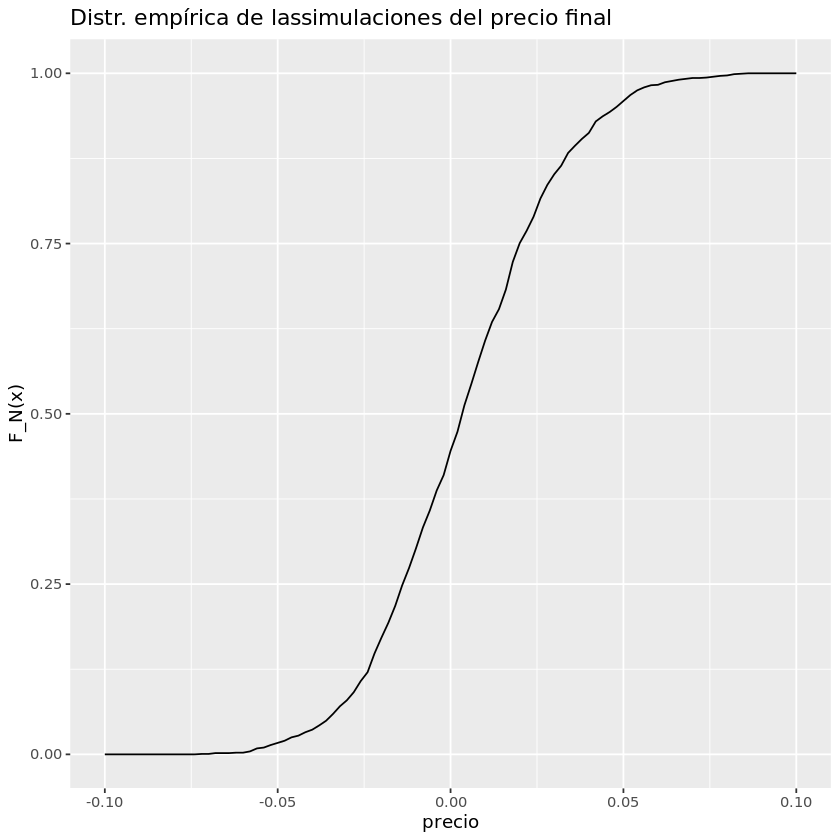

In [68]:
plot_port_sampleA = ggplot(data.frame(matrix_muestras[,1]),aes(matrix_muestras[,1]))+geom_function(fun=ecdf(matrix_muestras[,1]))+
         xlim(-0.1,0.1)+
         labs(x="precio",y="F_N(x)",
              title=paste0("Distr. empírica de lassimulaciones del precio final")) 
plot_port_sampleA

In [38]:
c(sample_A[1],sample_B[1],sample_C[1],sample_D[1])

[1]  0.001509745 -0.019962480 -0.022843988 -0.013135321

In [42]:
t(z)

[,1]        [,2]        [,3]        [,4]       
[1,] 0.003292436 -0.01743801 -0.01916263 -0.02005578

In [45]:
vector2=c()
vector2

NULL

In [47]:
rbind(vector2,t(z))

[,1]        [,2]        [,3]        [,4]       
[1,] 0.003292436 -0.01743801 -0.01916263 -0.02005578